# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

In [27]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t', index_col=0)

### Step 3. Assign it to a variable called chipo.

In [29]:
chipo=chipo.reset_index()

### Step 4. See the first 10 entries

In [15]:
chipo.head(10)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


### Step 5. Create a histogram of the top 5 items bought

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Chicken Bowl'),
  Text(1, 0, 'Chicken Burrito'),
  Text(2, 0, 'Chips and Guacamole'),
  Text(3, 0, 'Steak Burrito'),
  Text(4, 0, 'Canned Soft Drink')])

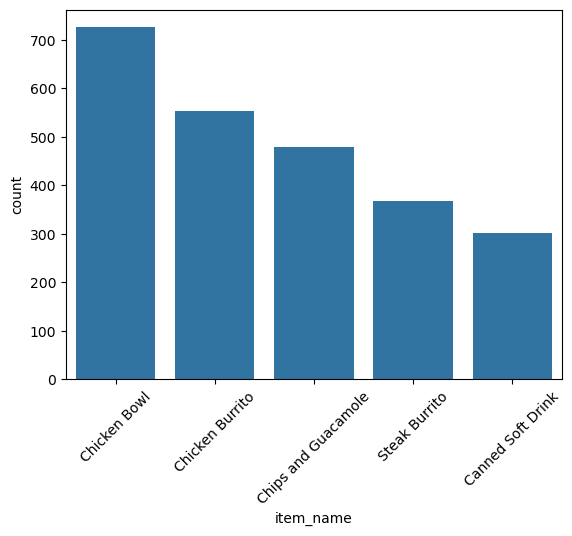

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

top_items = chipo['item_name'].value_counts().sort_values(ascending=False).head(5)
sns.barplot(top_items)
plt.xticks(rotation=45)

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/t6/l14298n92xx0dtft2b1m3sqm0000gn/T/ipykernel_42052/376458396.py:2: SyntaxWarning: invalid escape sequence '\$'
  chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True).astype(float)


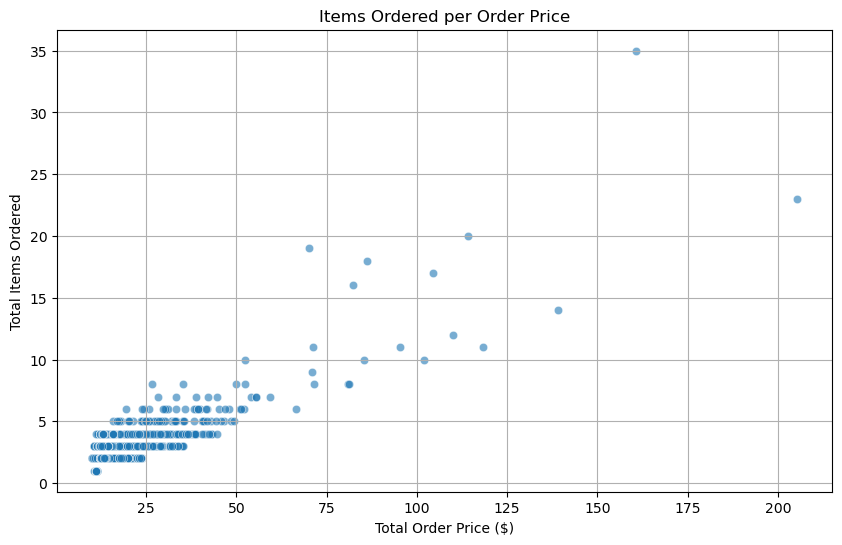

In [45]:
# item_price를 float로 변환
chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True).astype(float)

# 주문별로 총 가격과 총 수량 집계
order_summary = chipo.groupby('order_id').agg({'item_price': 'sum', 'quantity': 'sum'}).reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=order_summary, x='item_price', y='quantity', alpha=0.6)
plt.title('Items Ordered per Order Price')
plt.xlabel('Total Order Price ($)')
plt.ylabel('Total Items Ordered')
plt.grid(True)
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

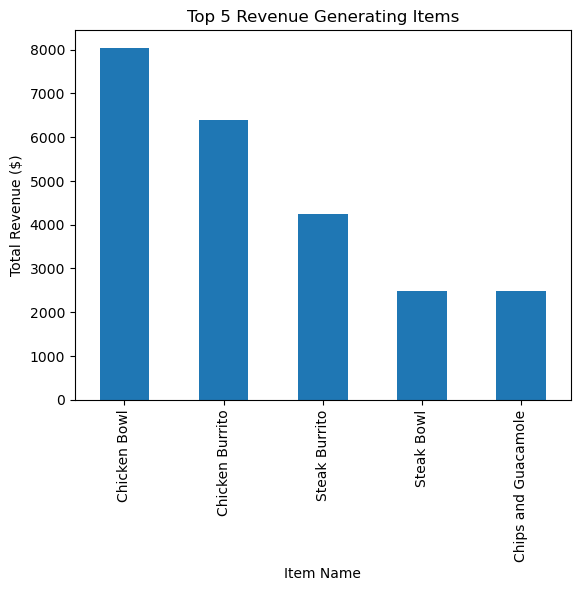

In [39]:
# "가장 많은 수익을 올린 아이템은 무엇일까?"

# 각 아이템 별로 총 수익을 계산합니다.
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
revenue_per_item = chipo.groupby('item_name')['revenue'].sum().sort_values(ascending=False).head(5)

# 그래프를 출력합니다.
revenue_per_item.plot(kind='bar')
plt.xlabel('Item Name')
plt.ylabel('Total Revenue ($)')
plt.title('Top 5 Revenue Generating Items')
plt.show()